#  Building a Model to Predict Housing Prices

Nicolas Lagger

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This report outlines the process of building a prediction model using linear regression for the sale price of a property. The project involves several steps including data preprocessing, data exploration, feature selection, model training, and evaluation. The preprocessing step involved handling missing values and encoding categorical variables in the dataset. The data exploration phase included an overview of the columns and a statistical analysis of the target variable (sale price). The visualization of the data was used to identify the most relevant features for the model. The linear regression model was trained on the selected features and evaluated for its performance. The model was then used to make predictions on unseen data, which can be useful for real estate appraisals or property valuations.

[Back to top](#Index)


## 1. Introduction

This project involves building a prediction model using linear regression. The goal is to use various features of a dataset to predict the target variable, in this case, the sale price of a property. To achieve this, the first step was to perform data preprocessing, including handling missing values and encoding categorical variables. Then, we explored the data through visualization and correlation analysis to identify the most relevant features for the model. After selecting the features, the linear regression model was trained on the data and evaluated for its performance. Finally, the model was used to make predictions on unseen data. The outcome of this project can be used as a reference for real estate appraisals or property valuations.

[Back to top](#Index)

## 2. The Data


[Back to top](#Index)

### 2.1  Import the Data

The initial step in our project using Python is to import the libraries needed to accomplish our task. 

We use Pandas, Numpy, Matplotlib and Seaborn. Pandas is a popular data library that allows us to easily manipulate and analyze structured data. Numpy is a scientific computing library that provides us with features for working with multidimensional arrays and complex mathematical operations. Matplotlib is a data visualization library that helps us create graphs to visualize our data. Finally, Seaborn is a Matplotlib-based library that provides advanced features to create more attractive and professional charts.

Now that we have imported the libraries needed to manipulate and analyze our data, we will load our dataset into a Pandas dataframe. To do this, we use the pd.read_csv() function specifying the name of our CSV file, in this case 'houseSmallData.csv'. 

To improve readability, we use the function pd.options.display.max_rows and max_columns to define the maximum number of rows and columns to display.


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# load the CSV file into a Pandas dataframe
df = pd.read_csv('houseSmallData.csv')

# set the maximum number of rows and columns to display
pd.options.display.max_rows = df.shape[0]
pd.options.display.max_columns = df.shape[1]

[Back to top](#Index)

### 2.2 Data Exploration


#### 2.2.1 Column overview

To get an overview of the column names and values contained in our dataframe, we use the function df.head(20). This function allows us to see the first 20 rows of our dataframe, so we can quickly see the values and data types in each column.

This provides a quick overview of the data in our data frame and allows us to determine the next steps to take in preparing our data for analysis.

In [78]:
# get an overview of the data
df.head(20) # prints the first 20 rows of the data


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,

Looking at the values, we see that some columns contain numeric values and some contain non-numeric values. We also notice that some columns have the same value entirely. This may indicate that these columns are not useful for our analysis and may need to be removed to get more relevant results.

#### 2.2.2 Data overview

In order to get a better understanding of the data in the DataFrame, the data_overview() function was created. It compiles the results of different functions of the pandas library into a single array to get an overview of the data. The function uses the following functions:

    df.count(): counts the number of non-empty values in each column.
    df.nunique(): calculates the number of unique values in each column.
    df.dtypes(): retrieves the data type of each column.


Then, to make the table easier to read, two more columns have been added to display the percentage of the main value and the percentage of missing values in each column.

In [79]:
def data_overview(df):
    """
    This function takes a pandas DataFrame as input and returns a summary of its data, including the percentage of the main value in each column and the percentage of missing values.
    
    Parameters:
    df (pandas DataFrame): The DataFrame to be summarized.
    
    Returns:
    pandas DataFrame: A summary DataFrame containing the number of non-null values, the number of unique values, the data type, and the percentage of the main value in each column of the input DataFrame.
    
    """
    # Calculate the number of non-null values in each column
    non_null_counts = df.count()

    # Calculate the number of unique values in each column
    unique_counts = df.nunique()

    # Get the data type of each column
    dtypes = df.dtypes
    
    # get number of row
    num_rows = len(df) #shape[0]

    # Create an empty list to store the main value percentages
    main_value_percentages = []
    
    # Create an empty list to store the main value percentages
    missing_value_percentages = []
    

    # Loop over each column in the DataFrame calculate the percentage of the main value in the column and the percentage of missing values
    for column in df.columns:
        
        # Count the number of times each value appears in a specific column and find the max
        value_counts = df[column].value_counts().max()

        # Calculate the percentage of the main value in the column
        percentage_main_value = value_counts *100/ num_rows
        
        # append the percentage to the main_value_percentages list
        main_value_percentages.append(percentage_main_value)

        # Count the number of missing values in a specific column
        
        missing_values = df[column].isna().sum()
        percentage = missing_values *100/ num_rows 
        
        # append the percentage to the missing_value_percentages list
        missing_value_percentages.append(percentage)
        
        
    #find which columns contain any nan-value
    #nan_value = df.isna().any()
        

    # Create a summary DataFrame using the results
    summary = pd.DataFrame({
        'non-null values': non_null_counts,
        'missing value %' : missing_value_percentages,
        'unique': unique_counts,
        'main value %': main_value_percentages,
        #'NaN Value': nan_value,
        'dtype': dtypes })

    # Return the summary DataFrame
    return summary

# Call the function to get a summary of the data, including the percentage of the main value in each column
summary_df = data_overview(df)

summary_df

,non-null values,missing value %,unique,main value %,dtype
Unnamed: 0,100,0.0,100,1.0,int64
Id,100,0.0,100,1.0,int64
MSSubClass,100,0.0,14,45.0,int64
MSZoning,100,0.0,4,78.0,object
LotFrontage,86,14.0,44,12.0,float64
LotArea,100,0.0,94,5.0,int64
Street,100,0.0,2,99.0,object
Alley,6,94.0,2,3.0,object
LotShape,100,0.0,3,60.0,object
LandContour,100,0.0,4,91.0,object


The analysis of the results shows that some columns will probably not be useful for further analysis, such as 'Alley' which has 94% missing values. Also, some columns have 100% of the same value, such as 'Utilities'. For example, the column 'MiscVal' has 6 different values, but 91% of the rows have the same value, so it will probably be difficult to find correlations. Columns with a small amount of missing values can be filled in during the data preparation phase.

These cases will be discussed in detail in the next chapter.

#### 2.2.2 Non numerical data overview

The non_numerical_items() function was created to understand in detail the non-numerical data present in the DataFrame. It allows to obtain a dictionary with as key the names of columns and as value the lists of values present in each of them.

In [80]:

def non_numerical_items(data):
    
    # Select only the non-numeric columns
    non_numerical_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
    
    #creat an empty dictionary
    non_numerical_dictionary = {}
    
    # Loop through each non-numerical column in the DataFrame
    for column in non_numerical_columns:
        
        # Get the unique values in the column
        unique_values = data[column].unique()
        
        #Converting one-dimensional NumPy Array to List        
        unique_values_list= unique_values.tolist()

        # Add the column name and unique values to the dictionary
        non_numerical_dictionary[column] = unique_values_list
        
    return non_numerical_dictionary

# Call the function to get a summary of the non-numerical data in the DataFrame
items = non_numerical_items(df)
print(items)

{'MSZoning': ['RL', 'RM', 'C (all)', 'FV'], 'Street': ['Pave', 'Grvl'], 'Alley': [nan, 'Grvl', 'Pave'], 'LotShape': ['Reg', 'IR1', 'IR2'], 'LandContour': ['Lvl', 'Bnk', 'Low', 'HLS'], 'Utilities': ['AllPub'], 'LotConfig': ['Inside', 'FR2', 'Corner', 'CulDSac'], 'LandSlope': ['Gtl', 'Mod'], 'Neighborhood': ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr'], 'Condition1': ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA'], 'Condition2': ['Norm', 'Artery', 'RRNn', 'Feedr'], 'BldgType': ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], 'HouseStyle': ['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf'], 'RoofStyle': ['Gable', 'Hip', 'Gambrel'], 'RoofMatl': ['CompShg', 'WdShngl'], 'Exterior1st': ['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing', 'CemntBd', 'Plywood', 'AsbShng', 'Stuc

We find that some columns contain categorical variables such as MSZoning with values 'RL', 'RM', 'C (all)', 'FV' which do not allow us to know with certainty which type is preferable.
Other columns have values that correspond to a quality scale, such as KitchenQual with the values 'Gd', 'TA', 'Ex', 'Fa' meaning respectively Good, Typical/Average, Excellent, and Fair and Poor. This immediately gives us a quality scale.

#### 2.2.3 SalePrice overview

The Pandas fonction' describe()  get a statistical overview of the column, including the mean, standard deviation, quartiles, etc. A histogram of the SalePrice column was creat to visualize its distribution. The purpose of this chapter is to understand how the sale prices are distributed in the dataset and possibly identify trends or anomalies.

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64


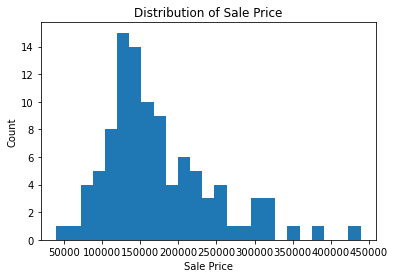

In [81]:
print(df['SalePrice'].describe())


# Plot a histogram of the SalePrice column
plt.hist(df['SalePrice'], bins=25)

# Add labels and title to the plot
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Distribution of Sale Price')


# Show the plot
plt.show()



#### 2.2.4 Visual representation of data

Analyzing the numerical data is a crucial aspect of understanding the selling prices in the dataset. To visualize the potential correlations between the different numeric variables and the selling price, i created the show_all_graph function. This function generates scatter graphs for each numeric column by comparing the values to the selling price. This graph allows to get an initial view of the potential relationships between the numerical variables and the selling price, which can help us select the most relevant variables for further analysis.

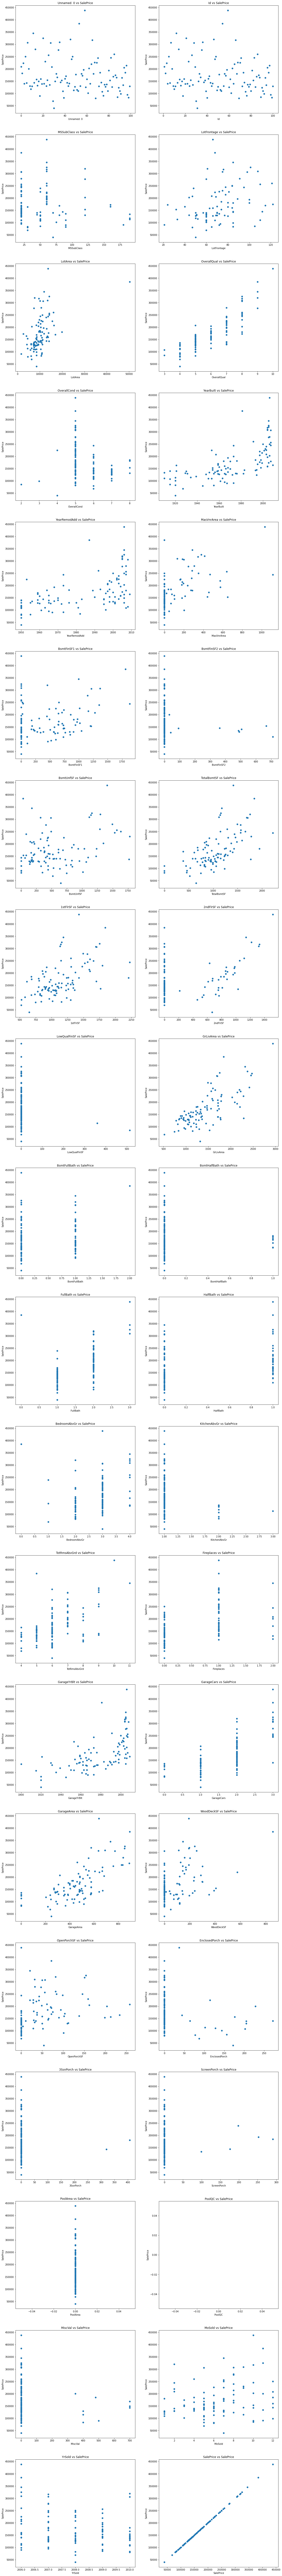

In [82]:
def show_all_graph(df,compare_value):
    # Select only the numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


    # Number of row plot
    nRow = len(numeric_columns)

    # Number of columns plot
    nColumns = 2

    # Create a subplot with ncols rows and 2 columns
    fig, axs = plt.subplots(int(nRow/2), 2, figsize=(20, 5*nRow))


    # Plot each numeric column against the SalePrice column
    for i, col in enumerate(numeric_columns):
        row = i // 2
        col_idx = i % 2
        axs[row, col_idx].scatter(df[col], df[compare_value])
        axs[row, col_idx].set_xlabel(col)
        axs[row, col_idx].set_ylabel(compare_value)
        axs[row, col_idx].set_title(col +' vs '+ compare_value)

    plt.show()
show_all_graph(df,'SalePrice')

After analysis of the above graphs, those selected for a more detailed description are the following:

- LotArea
- OverallQual
- GarageArea
- TotalBsmtSF
- GrLivArea
- BsmtFinSF1
- BsmtFinSF2
- OverallCond

To facilitate the discussion about these graphs a new plot and realize below


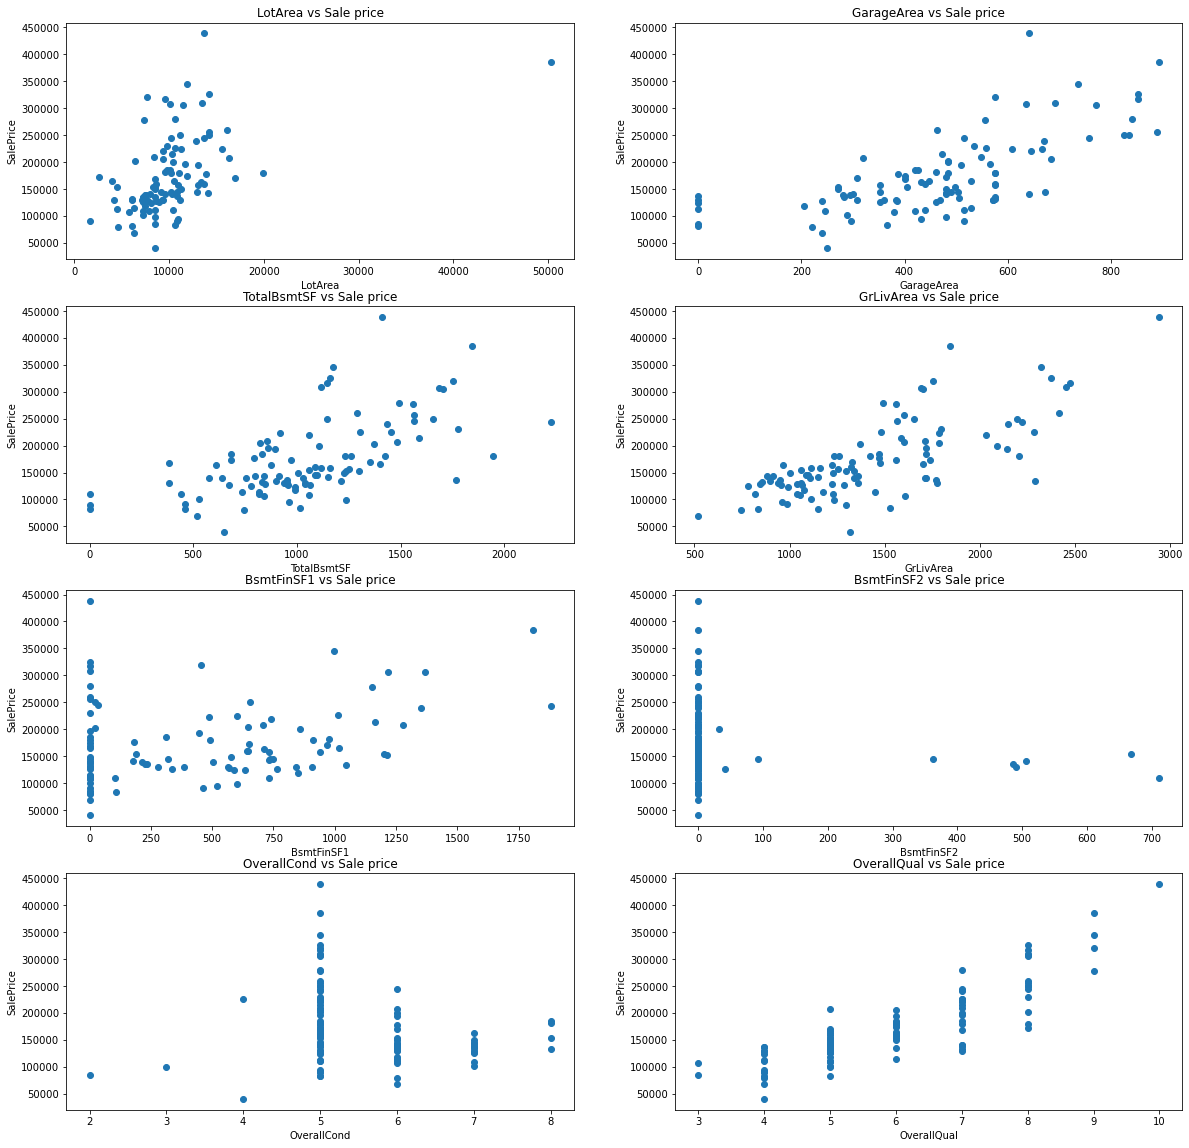

In [83]:
cols = ['LotArea', 'GarageArea', 'TotalBsmtSF', 'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2', 'OverallCond', 'OverallQual']

# Create a subplot with ncols rows and 2 columns
fig, axs = plt.subplots(int(len(cols)/2), 2, figsize=(20, 20))


# Plot each selected column against the SalePrice column
for i, col in enumerate(cols):
    row = i // 2
    col_idx = i % 2
    axs[row, col_idx].scatter(df[col], df['SalePrice'])
    axs[row, col_idx].set_xlabel(col)
    axs[row, col_idx].set_ylabel('SalePrice')
    axs[row, col_idx].set_title(col +' vs Sale price')
plt.show()

Here is a detailed description of the visual analysis of the different selected graphics:

**LotArea:**

The graph shows a good correlation, however there is one point on the graph that may skew the results of the analysis. This is the point with a value of 50271 for the LotArea.

**GarageArea and TotalBsmtSF:**

These two graphs also show a good correlation, however the variables with a value of 0 can potentially skew the results. It would be wise to eventually replace these values with the average of the other values.

**GrLivArea:**

This is probably the best correlation compared to price.

**BsmtFinSF1:**

If we ignore the BsmtFinSF1 values at 0, we would get a good correlation. However, it is unfortunately not possible to remove them as this would remove far too many values and the sample would no longer be representative.

**OverallCond:**

This is a value that intuitively should correlate with price, but we find that in the current state it is not possible to draw any conclusions. However, it is possibly possible to combine this value with GrLivArea to get a stronger correlation. This will be tested in the next chapter 

**OverallQual:**

A correlation is observed, but since this is a scale of values, the range is quite large for each value. This variable will be represented in another form below to get a better representation of the values.

**Remarque diver**

Adding the total number of bathrooms could indeed be interesting to see if there is a correlation with the sales price. The column can be created by adding the existing columns 'BsmtFullBath', 'BsmtHalfBath', 'FullBath' and 'HalfBath'.

The violin plot below displays the distribution of data by showing the density at different values. It provides a visual representation of the quartiles, median, and outliers of the distribution. The violin plot gives a more comprehensive picture of the distribution compared to other plots, such as box plots, as it shows the distribution in both its shape and spread.

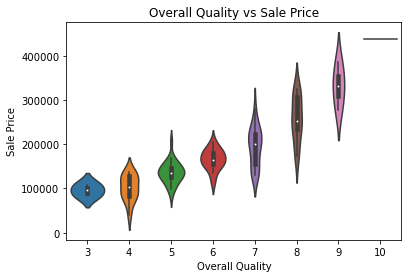

In [84]:
# violin plot of  OverallQual vs SalePrice
sns.violinplot(x='OverallQual', y='SalePrice', data=df)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Overall Quality vs Sale Price')

plt.show()

[Back to top](#Index)

### 2.3 Data Preparation

Determine if there are any missing values in the data. Did the data need to be reshaped? If yes, include a description of the steps you followed to clean the data



### 2.3.1 value deletion

In order to focus on the most relevant features, the below code removes some columns from the dataframe using the "drop()" function. The removal is done for specific reasons:

- Removal of "Id" and "Unnamed: 0" columns that do not contain any meaningful information for the analysis.
- Removal of columns with excessively high missing values. This is done using the "get_column_to_drop()" function, which returns a list of columns to be deleted based on a specified threshold.
- Removal of columns where the main value represents an excessive proportion of the column. This is done in the same way as for missing values using the using the "get_column_to_drop()" function.

Finally, the shapes of the original and modified dataframes are printed to verify the changes made.

The code also returns descriptive statistics of the modified dataframe.

In [85]:
# Call the data_overview function to get the summary statistics of the dataframe
summary_df = data_overview(df)

# Define a function to get the list of columns to drop based on the criteria and threshold value
def get_column_to_drop(summary_df,criteria,threshold):
    # Get the row indices where the value of  criteria value % is smaller than the threshold
    column_list = summary_df[summary_df[criteria] > threshold].index
    return column_list

# Get the list of columns if the main value value is too dominant
main_value_drop = get_column_to_drop(summary_df,'main value %',70)

# Print the list of columns to drop based on the main value criteria
print('main_value_drop :')
print(main_value_drop)

# Get the list of columns to drop based on the missing value criteria
missing_value_drop = get_column_to_drop(summary_df,'missing value %',50)

# Print the list of columns to drop based on the missing value criteria
print('missing_value_drop :')
print(missing_value_drop)

# Drop the unwanted columns 'Id' and 'Unnamed: 0', and the columns in the main_value_drop and missing_value_drop list
dff = df.drop('Id', axis=1).drop('Unnamed: 0', axis=1).drop(main_value_drop, axis=1).drop(missing_value_drop, axis=1)

# Get the summary statistics of the modified dataframe
summary_dff = data_overview(dff)

# Print the shapes of the original and modified dataframes
print(df.shape)
print(dff.shape)

# Return the summary statistics of the modified dataframe
summary_dff


main_value_drop :
Index(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl',
       'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath',
       'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SaleType', 'SaleCondition'],
      dtype='object')
missing_value_drop :
Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')
(100, 82)
(100, 44)


,non-null values,missing value %,unique,main value %,dtype
MSSubClass,100,0.0,14,45.0,int64
LotFrontage,86,14.0,44,12.0,float64
LotArea,100,0.0,94,5.0,int64
LotShape,100,0.0,3,60.0,object
LotConfig,100,0.0,4,64.0,object
Neighborhood,100,0.0,20,21.0,object
HouseStyle,100,0.0,7,58.0,object
OverallQual,100,0.0,8,31.0,int64
OverallCond,100,0.0,7,59.0,int64
YearBuilt,100,0.0,54,6.0,int64


###  2.3.3 Replacement of 0 values with the mean.

This chapter deals with replacing missing values in the columns "GarageArea" and "TotalBsmtSF". To do this, I defined a "replace_mean" function that calculates the average of the given column, then replaces the "0" values in that column with the average. I then called this function for the columns "GarageArea" and "TotalBsmtSF".

The purpose of this step is to prevent missing values from negatively affecting the results of the analysis by replacing them with the mean, which is a representative value for most of the other values in the column.

### 2.3.3 Replacement NaN values

In [86]:
def Replace_NaN(data): 
    # Replace NaN  in values numeric columns with the mean value of each column
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    column_mean = data[numeric_columns].mean(skipna=True)
    data[numeric_columns] = data[numeric_columns].fillna(column_mean)
    
    # Replace NaN values with the mode of each column
    categorical_columns = data.select_dtypes(include=['object']).columns
    column_mode = data[categorical_columns].mode().iloc[0]
    data[categorical_columns] = data[categorical_columns].fillna(column_mode.to_dict())
Replace_NaN(dff)


### 2.3.2 Encoding of categorical variables

After deleting the unnecessary columns in the dataframe, a new analysis of the remaining categorical variables is performed with the non_numerical_items function. Some of these variables, such as "LotShape", "LotConfig", "Neighborhood", "HouseStyle", "Exterior1st", "Exterior2nd", "MasVnrType" etc will be encoded using the one-hot encoding technique to separate the unique values into as many columns as there are unique values. 

However, for some variables that represent a scale of quality, such as KitchenQual, ordinal encoding will be used. The result will be a new numeric dataframe with encoded values for all categorical variables.

In [87]:
#use the non_numerical_items fonction to get the new list of item
new_items = non_numerical_items(dff)
print(new_items)

{'LotShape': ['Reg', 'IR1', 'IR2'], 'LotConfig': ['Inside', 'FR2', 'Corner', 'CulDSac'], 'Neighborhood': ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr'], 'HouseStyle': ['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf'], 'Exterior1st': ['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing', 'CemntBd', 'Plywood', 'AsbShng', 'Stucco'], 'Exterior2nd': ['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng', 'CmentBd', 'BrkFace', 'Stucco', 'AsbShng'], 'MasVnrType': ['BrkFace', 'None', 'Stone', 'BrkCmn'], 'ExterQual': ['Gd', 'TA', 'Ex', 'Fa'], 'Foundation': ['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab'], 'BsmtQual': ['Gd', 'TA', 'Ex', 'Fa'], 'BsmtExposure': ['No', 'Gd', 'Mn', 'Av'], 'BsmtFinType1': ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], 'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa'], 'KitchenQu

In [88]:
# Select the categorical columns for one hot encoding
categorical_cols = ['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle','Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'GarageType', 'GarageFinish']


# Use pandas get_dummies to perform one hot encoding
dummies_df = pd.get_dummies(dff, columns=categorical_cols, prefix=categorical_cols)

# get name of the new dummies columns
dummies_columns = []
for col in categorical_cols:
    for value in new_items[col]:
        dummies_columns.append(f'{col}_{value}')
        
print(dummies_columns)


# The new one hot encoded dataframe with numerical values
dummies_df

['LotShape_Reg', 'LotShape_IR1', 'LotShape_IR2', 'LotConfig_Inside', 'LotConfig_FR2', 'LotConfig_Corner', 'LotConfig_CulDSac', 'Neighborhood_CollgCr', 'Neighborhood_Veenker', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_Mitchel', 'Neighborhood_Somerst', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_BrkSide', 'Neighborhood_Sawyer', 'Neighborhood_NridgHt', 'Neighborhood_NAmes', 'Neighborhood_SawyerW', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Edwards', 'Neighborhood_Timber', 'Neighborhood_Gilbert', 'Neighborhood_StoneBr', 'Neighborhood_ClearCr', 'HouseStyle_2Story', 'HouseStyle_1Story', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'HouseStyle_2.5Unf', 'Exterior1st_VinylSd', 'Exterior1st_MetalSd', 'Exterior1st_Wd Sdng', 'Exterior1st_HdBoard', 'Exterior1st_BrkFace', 'Exterior1st_WdShing', 'Exterior1st_CemntBd', 'Exterior1st_Plywood', 'Exterior1st_AsbShng', 'Exterior1st_Stucco', 'Exterior2nd_VinylSd', 'E

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,LotShape_IR1,LotShape_IR2,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,Neighborhood_BrkSide,...,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,60,65.000000,8450,7,5,2003,2003,196.0,Gd,Gd,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,2003.000000,2,548,0,61,2,2008,208500,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
1,20,80.000000,9600,6,8,1976,1976,0.0,TA,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,1976.000000,2,460,298,0,5,2007,181500,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,60,68.000000,11250,7,5,2001,2002,162.0,Gd,Gd,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,2001.000000,2,608,0,42,9,2008,223500,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,70,60.000000,9550,7,5,1915,1970,0.0,TA,TA,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,1998.000000,3,642,0,35,2,2006,140000,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,60,84.000000,14260,8,5,2000,2000,350.0,Gd,Gd,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,2000.000000,3,836,192,84,12,2008,250000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
5,50,85.000000,14115,5,5,1993,1995,0.0,TA,Gd,GLQ,732,64,796,Ex,796,566,1362,1,1,1,1,TA,5,0,1993.000000,2,480,40,30,10,2009,143000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
6,20,75.000000,10084,8,5,2004,2005,186.0,Gd,Ex,GLQ,1369,317,1686,Ex,1694,0,1694,1,2,0,3,Gd,7,1,2004.000000,2,636,255,57,8,2007,307000,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
7,60,71.406977,10382,7,6,1973,1973,240.0,TA,Gd,ALQ,859,216,1107,Ex,1107,983,2090,1,2,1,3,TA,7,2,1973.000000,2,484,235,204,11,2009,200000,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
8,50,51.000000,6120,7,5,1931,1950,0.0,TA,TA,Unf,0,952,952,Gd,1022,752,1774,0,2,0,2,TA,8,2,1931.000000,2,468,90,0,4,2008,129900,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
9,190,50.000000,7420,5,6,1939,1950,0.0,TA,TA,GLQ,851,140,991,Ex,1077,0,1077,1,1,0,2,TA,5,2,1939.000000,1,205,0,4,1,2008,118000,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0


I decided to create a new dataframe 'dummies_df' so that I could easily compare the correlations separately in the next chapter.

In [89]:
# Define the list of columns that need to be ordinal encoded
ordinal_encoding_list = ['ExterQual','BsmtQual', 'KitchenQual']

# Define a function to perform ordinal encoding on the specified columns
def ordinal_encoding(data, col_list):
    # Loop through the list of columns
    for column in col_list:
        # Replace the categorical values with numerical values
        data[column].replace(['Ex', 'Gd', 'TA', 'Fa','Po'], [5, 4, 3, 2,1 ], inplace=True)
        
        # Replace NaN values with the average value
        data[column].replace(np.nan, 3, inplace=True)

# Call the ordinal_encoding function on the dataframe and the list of columns
ordinal_encoding(dff,ordinal_encoding_list)

# Print the updated dataframe with the ordinal encoded columns
print(dff[ordinal_encoding_list])

    ExterQual  BsmtQual  KitchenQual
0           4         4            4
1           3         4            3
2           4         4            4
3           3         3            4
4           4         4            4
5           3         4            3
6           4         5            4
7           3         4            3
8           3         3            3
9           3         3            3
10          3         3            3
11          5         5            5
12          3         3            3
13          4         4            4
14          3         3            3
15          3         3            3
16          3         3            3
17          3         3            3
18          3         3            4
19          3         3            3
20          4         5            4
21          3         3            4
22          4         4            4
23          3         4            3
24          3         3            4
25          4         4            4
2

###  2.3.3 Removal of outliers

here I test the effect of removing outliers on the correlation between the data. The code used for this first displays the initial correlation between the variable 'SalePrice' and 'LotArea', then removes a particular outlier from the 'LotArea' column using the drop method. Finally, the code displays the final correlation between the same variables to show the effect of removing the outlier.


start corrlation = 0.4971237897920366


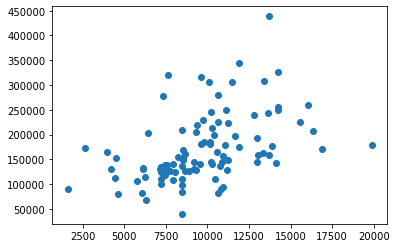

final corrlation = 0.45067233961454517


In [90]:
# Calculate and print the initial correlation between SalePrice and LotArea
print('start corrlation = ' + str(df['SalePrice'].corr(df['LotArea'])))

# Create a new dataframe with only the needed column
dff_test = dff[['LotArea', 'SalePrice']].copy()

#remoov the rows where LotArea != 50271 on the test datafram
dff_test.drop(dff_test[dff_test['LotArea'] == 50271].index, inplace=True)

# Plot a scatter plot of the new dataframe
plt.scatter(dff_test['LotArea'], dff_test['SalePrice'])
plt.show()

# Calculate and print the final correlation between SalePrice and LotArea
print('final corrlation = ' + str(dff_test['LotArea'].corr(dff_test['SalePrice'])))


However, as can be seen in the results, this manipulation did not have the desired effect and actually worsened the result, showing the importance of not simply removing outliers without a thorough analysis of the data and a clear understanding of the potential consequences.

### 2.3.4 Creation of new columns by combining other columns

Two new columns we will created by combining other existing columns. The first new column is called "CondArea" and is created by multiplying the values of the columns "OverallCond" and "GrLivArea". The second column is called "NumberBath" and is created by adding the values of the columns "BsmtFullBath", "BsmtHalfBath", "FullBath" and "HalfBath". The code then displays the correlation of "CondArea" with the "SalePrice" column and also displays a scatter plot to show the relationship between "NumberBath" and "SalePrice"

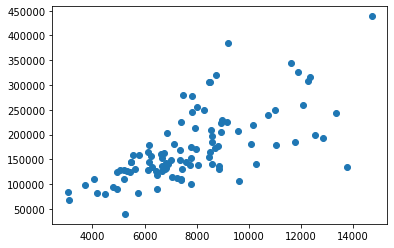

final corrlation for CondArea : = 0.6694138297218327


In [91]:
def CondArea(data):
    data['CondArea'] = data['OverallCond']* data['GrLivArea']

    
    
CondArea(dff)

plt.scatter(dff['CondArea'], dff['SalePrice'])
plt.show()
print('final corrlation for CondArea : = ' + str(dff['CondArea'].corr(dff['SalePrice'])))

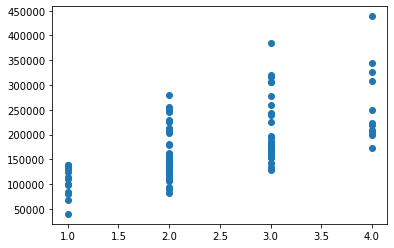

final corrlation for NumberBath = 0.6442165551590319


In [92]:

# add the missing column to dff
dff[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']] = df[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]

def NumberBath(data):
    data['NumberBath'] = data['BsmtFullBath']+data['BsmtHalfBath']+data['FullBath']+data['HalfBath']
    
NumberBath(dff)

plt.scatter(dff['NumberBath'], dff['SalePrice'])
plt.show()

print('final corrlation for NumberBath = ' + str(dff['NumberBath'].corr(dff['SalePrice'])))


[Back to top](#Index)

### 2.4 Correlation

In order to determine the correlations, two matrices were created from two different dataframes: 'dummies_df' and 'dff'. A 'corr_mat()' function was created to display the correlation matrix and obtain the n columns most correlated with the 'SalePrice' column.

dummies_df Correlation


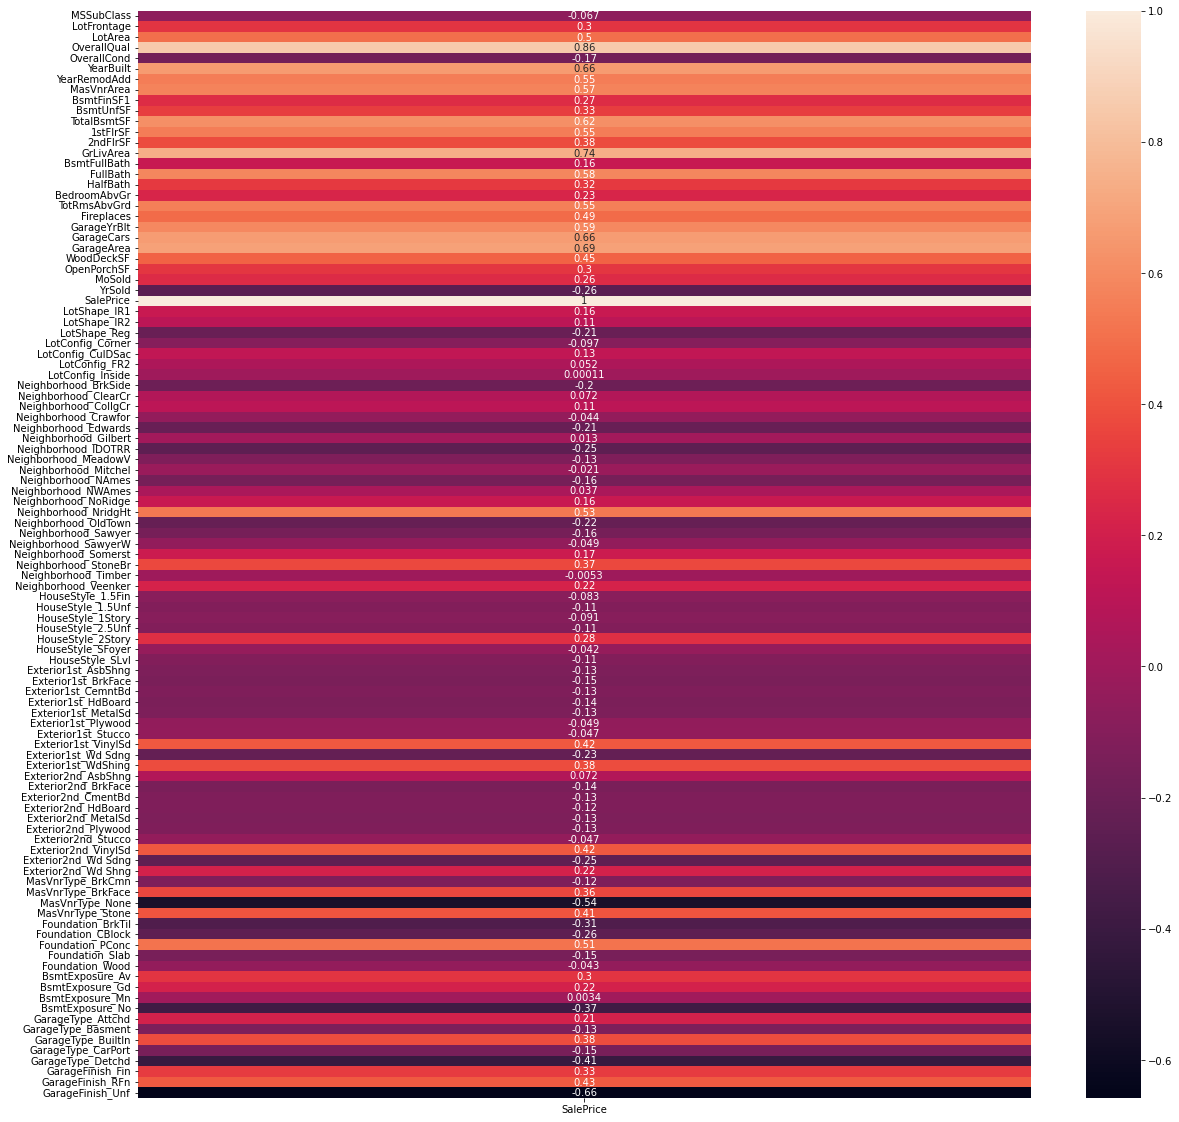

dff Correlation


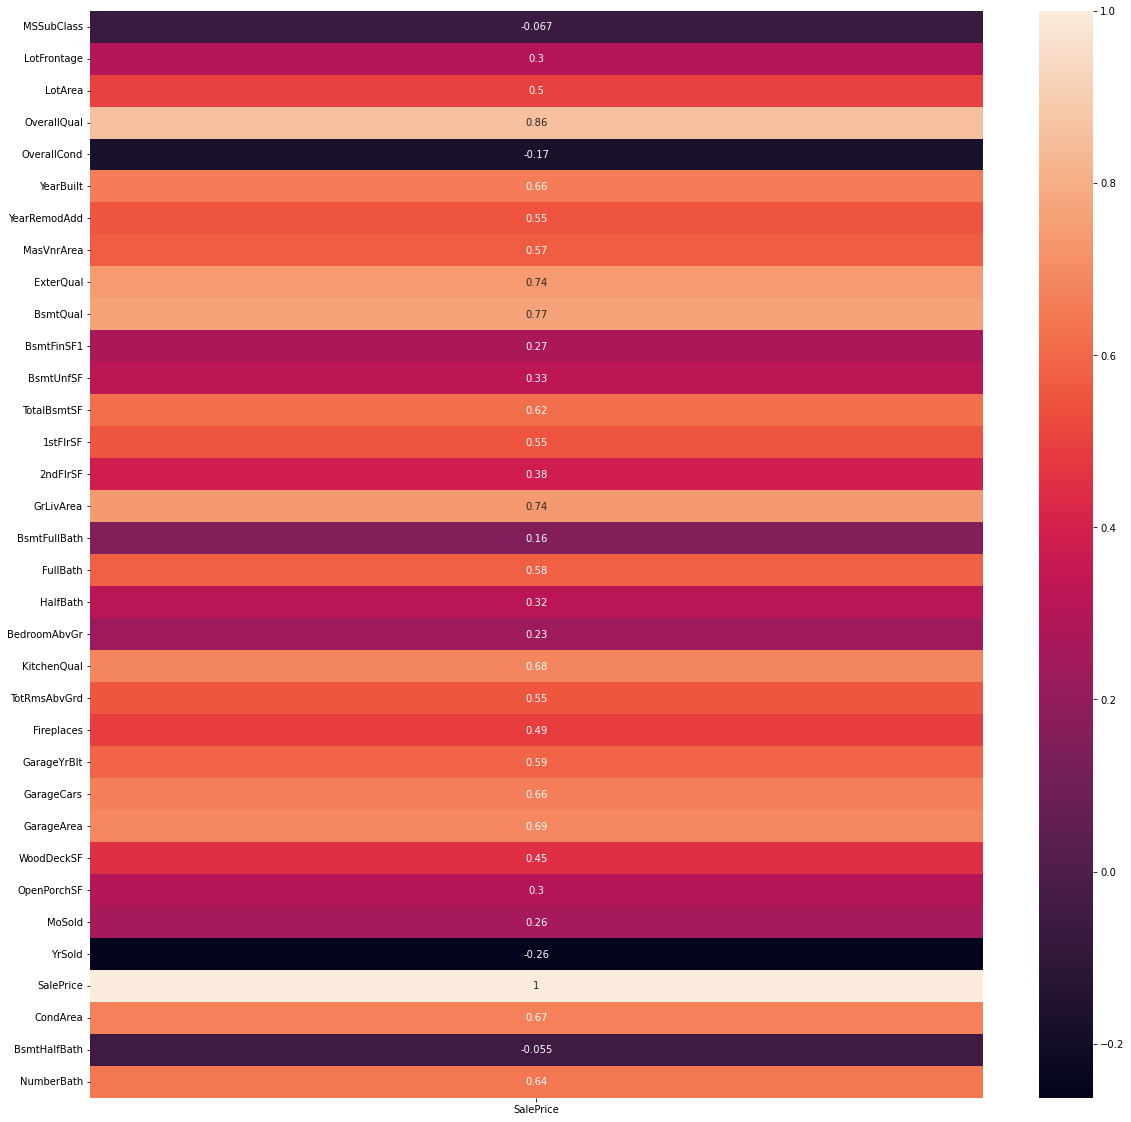

In [93]:
def corr_mat(data, nb_top_corr):
    """
    Function to visualize the correlation matrix and get the top n correlated columns with the SalePrice column.

    Parameters:
    data (DataFrame): DataFrame containing the data
    nb_top_corr (int): Number of top correlations to return

    Returns:
    index_list (list): List of column names of the top n correlated columns with the SalePrice column

    """
    # Create the correlation matrix
    corr_data = data.corr()
    
    # Only keep the correlations with the SalePrice column
    corr_sale_price = corr_data['SalePrice']
    
    # Visualize the correlation matrix with a heatmap
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr_sale_price.to_frame(), annot=True)
    plt.show()
    
    # Get the top n correlated columns with the SalePrice column
    top_corr = corr_sale_price.nlargest(nb_top_corr)
    index_list = top_corr.index.tolist()
    return index_list

print('dummies_df Correlation')
dummies_index = corr_mat(dummies_df, 20)
print('dff Correlation')
dff_index = corr_mat(dff, 20)  

In [94]:
dff_index

['SalePrice',
 'OverallQual',
 'BsmtQual',
 'ExterQual',
 'GrLivArea',
 'GarageArea',
 'KitchenQual',
 'CondArea',
 'GarageCars',
 'YearBuilt',
 'NumberBath',
 'TotalBsmtSF',
 'GarageYrBlt',
 'FullBath',
 'MasVnrArea',
 'TotRmsAbvGrd',
 '1stFlrSF',
 'YearRemodAdd',
 'LotArea',
 'Fireplaces']


[Back to top](#Index)

## 3. Project Description

The objective of this project is to predict the sale price of houses using a linear regression. To improve the prediction results, we added more variables to the linear regression and manipulated the data. For example, we replaced missing values with mean values and converted categorical variables to numerical variables using "one-hot" coding.

In addition, we created a function to determine the correlation matrix and extract the n most correlated columns with the SalePrice column. This allowed us to better understand the relationships between the variables and improve the accuracy of our model.

[Back to top](#Index)

### 3.1 Linear Regression

### 3.2 Analysis 

The analysis in this project was aimed at improving the prediction of the linear regression model by manipulating the data. To do this, a regression function used. The distribution of the target variable, sales price, was normalized using the logarithm of the sales price. Then, different data sets were used to find the best model.

### 3.3 Results

The code below shows the creation of the regression model and its use on the two datasets handled earlier. The linear regression model is trained using the variables most correlated with the sales price, obtained using the corr_mat function. The model score, which measures the fit of the model to the data, is displayed for each data set.

In [95]:
from sklearn import linear_model


In [96]:

train_x = dff[dff_index]
train_x = train_x.drop(['SalePrice'], axis=1)
train_y = np.log(dff.SalePrice)

lr = linear_model.LinearRegression()
model = lr.fit(train_x, train_y)
model_score = model.score(train_x, train_y)

print(model_score)

0.90005043743163


In [97]:
train_x_dummy = dummies_df[dummies_index]
train_x_dummy = train_x_dummy.drop(['SalePrice'], axis=1)
train_y_dummy = np.log(dummies_df.SalePrice)

lr = linear_model.LinearRegression()
model_dummy = lr.fit(train_x_dummy, train_y_dummy)
model_score_dummy = model_dummy.score(train_x_dummy, train_y_dummy)

print(model_score_dummy)

0.8829764450997786


Analysis of the results shows that both dataframes yielded high scores for linear regression. Specifically, the "dummies_df" dataframe scored 0.88, while the "dff" dataframe scored 0.89. This indicates that both datasets perform well in predicting sales price, but the "dff" dataframe slightly outperformed the "dummies_df".

However, it is important to note that these scores are only a general measure of performance and may not reflect the actual accuracy of predictions for each individual property. It is then necessary to test the model on unknown values. 

[Back to top](#Index)

### 3.4 Verifcation again Test Data


In [98]:
# import the test data
data_test = pd.read_csv('jtest.csv',index_col=0)

#perform the same operation as on the inital data
replace_mean(data_test, 'GarageArea', 0)
replace_mean(data_test, 'TotalBsmtSF', 0)
NumberBath(data_test)
CondArea(data_test)
ordinal_encoding(data_test,ordinal_encoding_list)
Replace_NaN(data_test)
ordinal_encoding(dff,ordinal_encoding_list)
data_test = pd.get_dummies(data_test, columns=categorical_cols, prefix=categorical_cols)


In [99]:
test_x = data_test[dff_index]
test_x = test_x.drop(['SalePrice'], axis=1)
test_y = np.log(data_test.SalePrice)


model_score = model.score(test_x, test_y)


In [100]:
print(model_score)

0.8709835276846679


In [101]:
test_x_dummy = data_test[dummies_index]
test_x_dummy = test_x_dummy.drop(['SalePrice'], axis=1)
test_y_dummy = np.log(data_test.SalePrice)


model_score = model_dummy.score(test_x_dummy, test_y_dummy)

In [102]:
print(model_score)

0.8270755851713542


When checking on the test data, I found that the dummy model obtained a score of 0.828, which is lower than its score obtained on the baseline data of 0.88. However, the dff model obtained a score of 0.8025873569591723, which is lower than dummy model while this model had obtained a better score with the data initail

[Back to top](#Index)

## Conclusion

The outcome of this project demonstrates the importance of thorough data preprocessing and analysis in the building of a predictive model. The results showed that linear regression can be an effective method for predicting the sale price of a property based on various features. The findings of this project can be used as a reference for real estate professionals and individuals who are interested in property valuations. In the future, more advanced machine learning algorithms and models can be employed to achieve better performance, and additional features can be considered to improve the accuracy of the predictions.






[Back to top](#Index
)
## References

https://pandas.pydata.org/docs/user_guide/options.html 

https://www.digitalocean.com/community/tutorials/python-convert-numpy-array-to-list 

https://rstudio-pubs-static.s3.amazonaws.com/650772_8fd3532644ce4d248755f5ec4eb7893a.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html 

https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/ 

